# 1. Data Quality Analysis (DQA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from category_encoders import OrdinalEncoder
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
url = "https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true"
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [3]:
# Exploring data
display(data.head())
display(data.info())
display(data.describe())

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


None

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
#Find missing value
display(data.isnull().sum()) 

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [5]:
#Descriptive Statistics for #hours_per_week_bin
display("Counts: ",data.hours_per_week_bin.sort_index().value_counts())


#mode
display("Mode: ", data.hours_per_week_bin.mode())


#min
display("Min: ",data.hours_per_week_bin.min())


#max
display("Max: ",data.hours_per_week_bin.max())

'Counts: '

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

'Mode: '

0    b. 31-40
dtype: object

'Min: '

'a. 0-30'

'Max: '

'e. 51-60'

In [6]:
#Descriptive Statistics for #age_bin
display("Counts: ",data.age_bin.sort_index().value_counts())


#mode
display("Mode: ", data.age_bin.mode())


#min
display("Min: ",data.age_bin.min())


#max
display("Max: ",data.age_bin.max())

'Counts: '

e. 40-55             13963
a. 0-25               9627
c. 31-35 & 61-70      9291
d. 36-40 & 56-60      8927
b. 26-30 & 71-100     7034
Name: age_bin, dtype: int64

'Mode: '

0    e. 40-55
dtype: object

'Min: '

'a. 0-25'

'Max: '

'e. 40-55'

In [7]:
#Descriptive Statistics for #capital_gl_bin
display("Counts: ",data.capital_gl_bin.sort_index().value_counts())


#mode
display("Mode: ", data.capital_gl_bin.mode())


#min
display("Min: ",data.capital_gl_bin.min())


#max
display("Max: ",data.capital_gl_bin.max())

'Counts: '

a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

'Mode: '

0    a. = 0
dtype: object

'Min: '

'a. = 0'

'Max: '

'c. > 0'

In [8]:
#Descriptive Statistics for #education_bin
display("Counts: ",data.education_bin.sort_index().value_counts())


#mode
display("Mode: ", data.education_bin.mode())


#min
display("Min: ",data.education_bin.min())


#max
display("Max: ",data.education_bin.max())

'Counts: '

b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: education_bin, dtype: int64

'Mode: '

0    b. Mid
dtype: object

'Min: '

'a. Low'

'Max: '

'e. High'

In [9]:
#Descriptive Statistics for #occupation_bin
display("Counts: ",data.occupation_bin.sort_index().value_counts())


#mode
display("Mode: ", data.occupation_bin.mode())


#min
display("Min: ",data.occupation_bin.min())


#max
display("Max: ",data.occupation_bin.max())

'Counts: '

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

'Mode: '

0    c. Mid - Mid
dtype: object

'Min: '

'a. Low'

'Max: '

'e. High'

In [10]:
#Descriptive Statistics for #msr_bin
display("Counts: ",data.msr_bin.sort_index().value_counts())


#mode
display("Mode: ", data.msr_bin.mode())


#min
display("Min: ",data.msr_bin.min())


#max
display("Max: ",data.msr_bin.max())

'Counts: '

c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

'Mode: '

0    c. High
dtype: object

'Min: '

'a. Low'

'Max: '

'c. High'

In [11]:
#Descriptive Statistics for #race_sex_bin
display("Counts: ",data.race_sex_bin.sort_index().value_counts())


#mode
display("Mode: ", data.race_sex_bin.mode())


#min
display("Min: ",data.race_sex_bin.min())


#max
display("Max: ",data.race_sex_bin.max())

'Counts: '

c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

'Mode: '

0    c. High
dtype: object

'Min: '

'a. Low'

'Max: '

'c. High'

In [12]:
#Descriptive Statistics for #education_num_bin
display("Counts: ",data.education_num_bin.sort_index().value_counts())


#mode
display("Mode: ", data.education_num_bin.mode())


#min
display("Min: ",data.education_num_bin.min())


#max
display("Max: ",data.education_num_bin.max())

'Counts: '

b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64

'Mode: '

0    b. 9-12
dtype: object

'Min: '

'a. 0-8'

'Max: '

'e. 15+'

In [13]:
#Descriptive Statistics for #workclass_bin
display("Counts: ",data.workclass_bin.sort_index().value_counts())


#mode
display("Mode: ", data.workclass_bin.mode())


#min
display("Min: ",data.workclass_bin.min())


#max
display("Max: ",data.workclass_bin.max())

'Counts: '

b. income       46012
a. no income     2830
Name: workclass_bin, dtype: int64

'Mode: '

0    b. income
dtype: object

'Min: '

'a. no income'

'Max: '

'b. income'

In [14]:
#Descriptive Statistics for #flag
display("Counts: ",data.flag.sort_index().value_counts())


#mode
display("Mode: ", data.flag.mode())


#min
display("Min: ",data.flag.min())


#max
display("Max: ",data.flag.max())

'Counts: '

train    32561
test     16281
Name: flag, dtype: int64

'Mode: '

0    train
dtype: object

'Min: '

'test'

'Max: '

'train'

# 2. Exploratory Data Analysis (EDA)

<AxesSubplot:title={'center':'age_bin'}, xlabel='age_bin'>

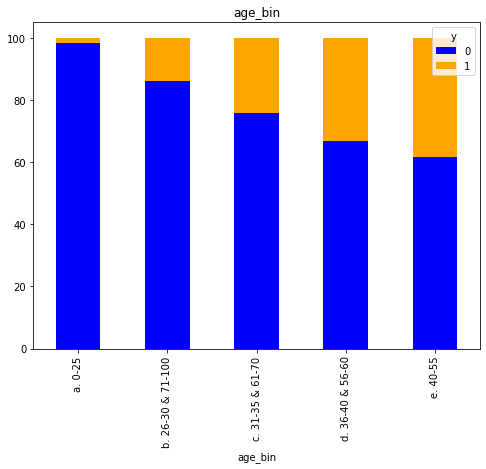

In [15]:
var = data.groupby(['age_bin','y']).age_bin.count()
var2 = data.groupby('age_bin').age_bin.count()
var3 = var/var2*100
var3.unstack().plot(kind='bar',stacked=True,title = 'age_bin',  color=['blue','orange'],
                    grid=False,figsize=(8, 6))

<AxesSubplot:title={'center':'capital_gl_bin'}, xlabel='age_bin'>

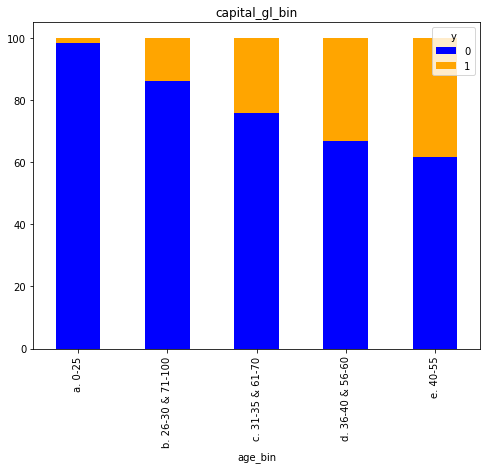

In [16]:
v = data.groupby(['capital_gl_bin','y']).capital_gl_bin.count()
v2 = data.groupby('capital_gl_bin').capital_gl_bin.count()
v3 = var/var2*100
v3.unstack().plot(kind='bar',stacked=True,title = 'capital_gl_bin',  color=['blue','orange'],
                    grid=False,figsize=(8, 6))

<AxesSubplot:title={'center':'education_bin '}, xlabel='education_bin'>

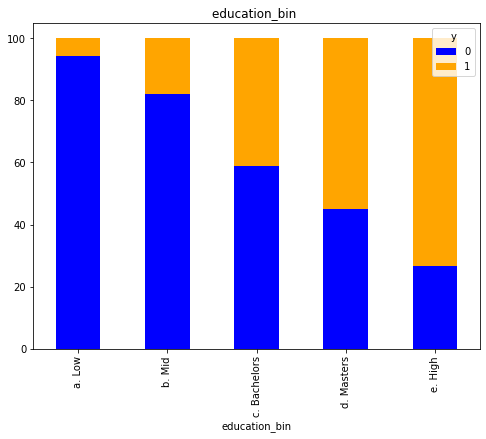

In [17]:
var = data.groupby(['education_bin','y']).education_bin.count()
var2 = data.groupby('education_bin').education_bin.count ()
var3 = var/var2*100
var3.unstack().plot(kind='bar',stacked=True,title = 'education_bin ',  color=['blue','orange'],
                    grid=False,figsize=(8, 6))

<AxesSubplot:title={'center':'hours_per_week_bin '}, xlabel='education_bin'>

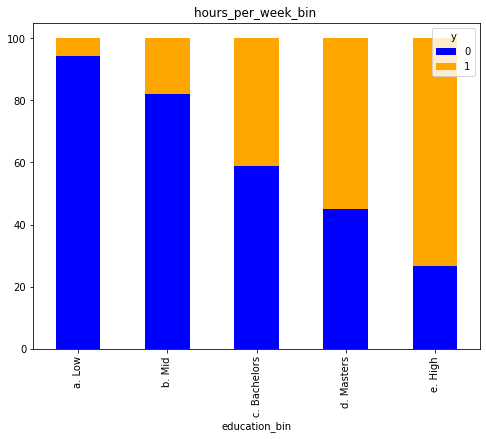

In [18]:
v = data.groupby(['hours_per_week_bin','y']).hours_per_week_bin.count()
v2 = data.groupby('hours_per_week_bin').hours_per_week_bin.count ()
v3 = var/var2*100
v3.unstack().plot(kind='bar',stacked=True,title = 'hours_per_week_bin ',  color=['blue','orange'],
                    grid=False,figsize=(8, 6))

<AxesSubplot:title={'center':'msr_bin'}, xlabel='msr_bin'>

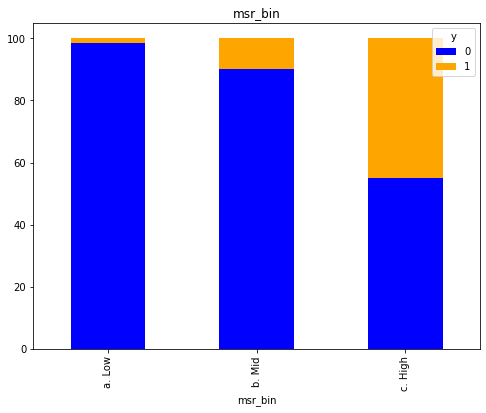

In [19]:
var = data.groupby(['msr_bin','y']).msr_bin.count()
var2 = data.groupby('msr_bin').msr_bin.count ()
var3 = var/var2*100
var3.unstack().plot(kind='bar',stacked=True,title = 'msr_bin',  color=['blue','orange'],
                    grid=False,figsize=(8, 6))

<AxesSubplot:title={'center':'occupation_bin '}, xlabel='occupation_bin'>

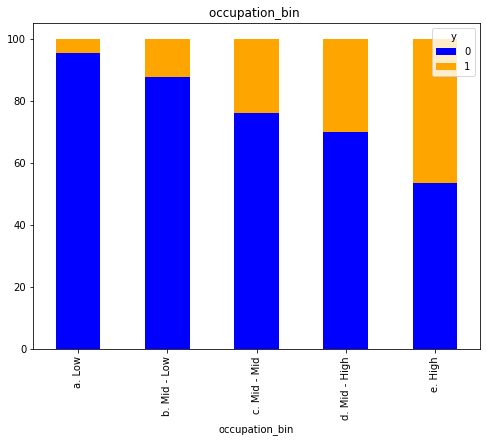

In [20]:
var = data.groupby(['occupation_bin','y']).occupation_bin.count()
var2 = data.groupby('occupation_bin').occupation_bin.count ()
var3 = var/var2*100
var3.unstack().plot(kind='bar',stacked=True,title = 'occupation_bin ',  color=['blue','orange'],
                    grid=False,figsize=(8, 6))

<AxesSubplot:title={'center':'race_sex_bin '}, xlabel='race_sex_bin'>

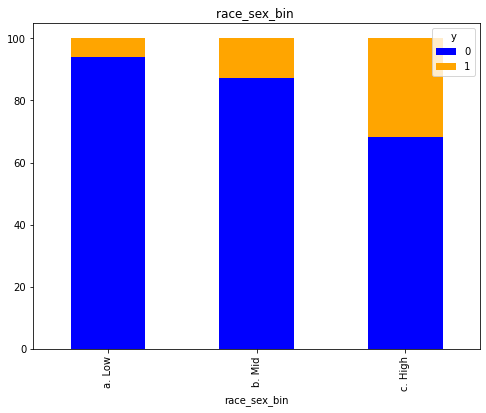

In [21]:
var = data.groupby(['race_sex_bin','y']).race_sex_bin.count()
var2 = data.groupby('race_sex_bin').race_sex_bin.count ()
var3 = var/var2*100
var3.unstack().plot(kind='bar',stacked=True,title = 'race_sex_bin ',  color=['blue','orange'],
                    grid=False,figsize=(8, 6))

# 3. Build Decision Tree Classifier Models

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [23]:
#feature selection
#split dataset in features and target variable
feature_cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                'msr_bin','occupation_bin','race_sex_bin']
X = data[feature_cols] #feature
t = data.y #target variable

# splitting data
# split dataset into training set and test set
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size = 0.25, random_state = 1) # 70% training and 30% testing

#building decision tree model
# create decision tree classifer object
clf = DecisionTreeClassifier(max_depth =10, random_state = 101,
                              max_features = None, min_samples_leaf =15)
encoder = OrdinalEncoder(cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                                 'msr_bin','occupation_bin','race_sex_bin'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,t_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
       

# Train Decision Tree Claaifer
clf = clf.fit(X_train, t_train)


# predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating model
#model accuracy, how often is the classifier correct
print("Accuracy:", metrics.accuracy_score(t_test, y_pred))

Accuracy: 0.8401441323396938


# 4. Visualize Your Decision Tree using GraphViz

In [24]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# 5. Evaluate Decision Tree Performance¶

[[8552  740]
 [1212 1707]]


None

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9292
           1       0.70      0.58      0.64      2919

    accuracy                           0.84     12211
   macro avg       0.79      0.75      0.77     12211
weighted avg       0.83      0.84      0.84     12211



None

Accuracy: 0.8401441323396938


None

auc is 0.7525754563927728


None

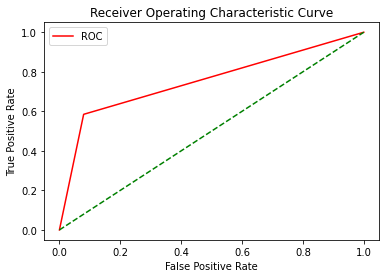

In [25]:
display(print(confusion_matrix(t_test, y_pred))) # confusion matrix
display(print(classification_report(t_test, y_pred)))
display(print("Accuracy:", metrics.accuracy_score(t_test, y_pred)))
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(t_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


display(print("auc is", auc(false_positive_rate, true_positive_rate)))
plot_roc_curve(false_positive_rate, true_positive_rate)

# 6. Tune Decision Tree Performance

In [26]:
#feature selection
#split dataset in features and target variable
feature_cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                'msr_bin','occupation_bin','race_sex_bin']
X = data[feature_cols]# Feature
t = data.y #target variable

#split data
#split dataset into training set and test set
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size = 0.25, random_state = 1) # 75% training and 32% testing

#build decision tree model
#create decision tree classifer object
clf = DecisionTreeClassifier(criterion='gini', min_samples_split=9, min_samples_leaf=9, max_depth=9)
encoder = OrdinalEncoder(cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                                 'msr_bin','occupation_bin','race_sex_bin'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,t_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
       

#train Decision Tree classifer
clf = clf.fit(X_train, t_train)


#predict the response for test dataset
y_pred = clf.predict(X_test)

#evaluate the model
#model the accuracy, how often is the classifier correctly worked
display(print("Accuracy:", metrics.accuracy_score(t_test, y_pred)))
display(print(classification_report(t_test, y_pred)))

Accuracy: 0.8417819998362133


None

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9292
           1       0.71      0.57      0.63      2919

    accuracy                           0.84     12211
   macro avg       0.79      0.75      0.77     12211
weighted avg       0.83      0.84      0.84     12211



None

# 7. Conclusion

In [29]:
#Answers:
#Q.8.1 How long was your total run time to train the model? 
#About 60 seconds.

#Q.8.2 Did you find the BEST TREE? 
#Yes. The accuracy is 0.8417001064613873

In [30]:
#Q.8.3 Draw the Graph of the BEST TREE Using GraphViz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
#Answers:
#Q.8.4 What makes it the best tree? 
#75% for training and 25% for testing.

# 8. Automation of Performance Tuning

In [35]:
#feature selection
#split dataset into features and target variable
feature_cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                'msr_bin','occupation_bin','race_sex_bin']
X = data[feature_cols]
# features
t = data.y 
#target variable

# split data
# split dataset into training set and test set
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size = 0.25, random_state = 1) 
# 75% training and 25% testing

#building decision tree model
# create decision tree classifer object
param = {'criterion':['gini','entropy'],'max_depth':[1,5,6,10,12],
         'min_samples_leaf':[1,5,6,10,12],
         'min_samples_split':[1,5,6,10,12]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=6)
encoder = OrdinalEncoder(cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                                 'msr_bin','occupation_bin','race_sex_bin'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,t_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
       

# Train Decision Tree Claaifer
grid.fit(X_train,t_train)
print('The best is:',grid.best_params_,'The best score is:', grid.best_score_)

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_vali

The best is: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 12} The best score is: 0.8412275435367476


/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7606399  0.7606399  0.7606399  0.7606399         nan
 0.7606399  0.7606399  0.7606399  0.7606399         nan 0.7606399
 0.7606399  0.7606399  0.7606399         nan 0.7606399  0.7606399
 0.7606399  0.7606399         nan 0.7606399  0.7606399  0.7606399
 0.7606399         nan 0.82806916 0.82806916 0.82806916 0.82809646
        nan 0.82806916 0.82806916 0.82806916 0.82809646        nan
 0.82812376 0.82812376 0.82812376 0.82812376        nan 0.82815106
 0.82815106 0.82815106 0.82815106        nan 0.82815106 0.82815106
 0.82815106 0.82815106        nan 0.83372023 0.83369293 0.83372023
 0.83374752        nan 0.83377483 0.83377483 0.83377483 0.83380213
        nan 0.83385673 0.83385673 0.83385673 0.83385673        nan
 0.83385673 0.83385673 0.83385673 0.83385673        nan 0.83388403
 0.83388403 0.83388403 0.83388403        nan

# 9. Prediction using your “trained” Decision Tree Model

In [31]:
encoder

OrdinalEncoder(cols=['age_bin', 'capital_gl_bin', 'education_bin',
                     'hours_per_week_bin', 'msr_bin', 'occupation_bin',
                     'race_sex_bin'],
               mapping=[{'col': 'age_bin', 'data_type': dtype('O'),
                         'mapping': e. 40-55             1
d. 36-40 & 56-60     2
a. 0-25              3
b. 26-30 & 71-100    4
c. 31-35 & 61-70     5
NaN                 -2
dtype: int64},
                        {'col': 'capital_gl_bin', 'data_type': dtype('O'),
                         'mapping': c. > 0    1
a. = 0    2
b. < 0    3
NaN      -2
dtype: int6...
                         'mapping': d. 41-50 & 61-70    1
b. 31-40            2
a. 0-30             3
e. 51-60            4
c. 71-100           5
NaN                -2
dtype: int64},
                        {'col': 'msr_bin', 'data_type': dtype('O'),
                         'mapping': c. High    1
b. Mid     2
a. Low     3
NaN       -2
dtype: int64},
                        {'col': 'occup

In [32]:
a = ([[2,2,3,1,1,3,2]])
pre_result = clf.predict(a)
display(print("prediction is ", str(pre_result)))
probs = clf.predict_proba(a)
display(print("the probability of the outcome of the prediction is",str(probs)))

prediction is  [0]


None

the probability of the outcome of the prediction is [[0.62785041 0.37214959]]


None

In [34]:
#Answers:
#Q.10.1 What is the probability of the outcome of the prediction for this ? 
#What is your decision probability threshold and what is your predicted decision based on that?
#The probability of less than 50k is 0.62, the probability of greater than 50k is 0.37
#So my prediction is less than 50k base on that. 

#Q.10.2 What is the probability that your outcome prediction is accurate?
#50%